William Austin<br>
Prakash Dhimal<br>
George Mason University<br>
CS 584 Theory and Applications of Data Mining<br>
Semester project: Predicting the Impact of COVID-19

In [1]:
import pandas as pd
import numpy as np

In [2]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

In [3]:
print(confirmed_df.get(0))

None


In [4]:
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,3778,4033,4402,4687,4963,5226,5639,6053,6402,6664
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,850,856,868,872,876,880,898,916,933,946
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,5369,5558,5723,5891,6067,6253,6442,6629,6821,7019
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,752,754,755,755,758,760,761,761,761,761
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,43,43,45,45,45,45,48,48,48,48


In [5]:
cols = confirmed_df.keys()

In [6]:
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '5/8/20', '5/9/20', '5/10/20', '5/11/20', '5/12/20', '5/13/20',
       '5/14/20', '5/15/20', '5/16/20', '5/17/20'],
      dtype='object', length=121)

In [7]:
confirmed_dates = confirmed_df.loc[:, cols[4]:cols[-1]]


In [8]:
confirmed_dates

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20
0,0,0,0,0,0,0,0,0,0,0,...,3778,4033,4402,4687,4963,5226,5639,6053,6402,6664
1,0,0,0,0,0,0,0,0,0,0,...,850,856,868,872,876,880,898,916,933,946
2,0,0,0,0,0,0,0,0,0,0,...,5369,5558,5723,5891,6067,6253,6442,6629,6821,7019
3,0,0,0,0,0,0,0,0,0,0,...,752,754,755,755,758,760,761,761,761,761
4,0,0,0,0,0,0,0,0,0,0,...,43,43,45,45,45,45,48,48,48,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,0,0,0,0,0,0,0,0,0,0,...,208,208,208,208,208,220,235,235,235,235
262,0,0,0,0,0,0,0,0,0,0,...,34,34,51,56,65,70,85,106,122,128
263,0,0,0,0,0,0,0,0,0,0,...,8,11,11,11,11,11,11,11,11,11
264,0,0,0,0,0,0,0,0,0,0,...,522,612,612,661,729,801,907,1118,1322,1524


In [9]:
dates = confirmed_dates.keys()

In [10]:
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

In [11]:
deaths_numbers = deaths_df.loc[:, cols[4]:cols[-1]]

In [12]:
deaths_df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,109,115,120,122,127,132,136,153,168,169
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,31,31,31,31,31,31,31,31,31,31
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,488,494,502,507,515,522,529,536,542,548
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,47,48,48,48,48,49,49,49,51,51
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,...,5,5,5,5,5,6,7,7,7,7
262,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,7,7,8,9,10,12,12,15,18,20
263,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
264,NaN,Tajikistan,38.861034,71.276093,0,0,0,0,0,0,...,12,20,20,21,21,23,29,33,36,39


In [13]:
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [14]:
recoveries_numbers = recoveries_df.loc[:, cols[4]:cols[-1]]

In [15]:
recoveries_df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,472,502,558,558,610,648,691,745,745,778
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,620,627,650,654,682,688,694,705,714,715
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,2467,2546,2678,2841,2998,3058,3158,3271,3409,3507
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,537,545,550,550,568,576,596,604,615,617
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,11,13,13,13,13,14,14,17,17,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,...,4,4,4,4,4,4,4,4,4,4
249,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
250,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,...,0,0,0,0,0,0,3,3,3,3
251,NaN,Tajikistan,38.861034,71.276093,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### World Cases

In [16]:
world_cases = []
total_deaths = [] 
mortality_rate = []
total_recovered = [] 
for i in dates:
    confirmed_sum = confirmed_dates[i].sum()
    death_sum = deaths_numbers[i].sum()
    recovered_sum = recoveries_numbers[i].sum()
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    mortality_rate.append(death_sum/confirmed_sum)
    total_recovered.append(recovered_sum)

In [17]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)

In [18]:
import matplotlib.pyplot as plt 
%matplotlib inline

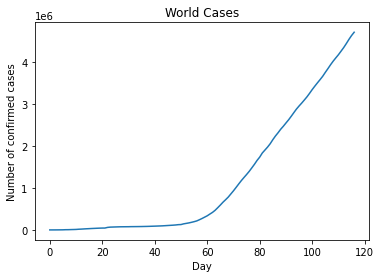

In [19]:
plt.plot(world_cases)
plt.title("World Cases")
plt.xlabel("Day")
plt.ylabel("Number of confirmed cases")
plt.show()

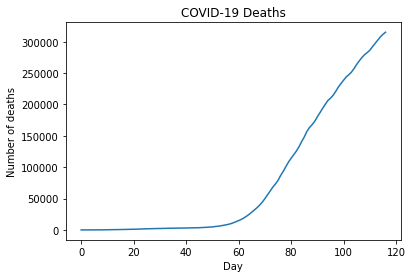

In [20]:
plt.plot(total_deaths)
plt.title("COVID-19 Deaths")
plt.xlabel("Day")
plt.ylabel("Number of deaths")
plt.show()

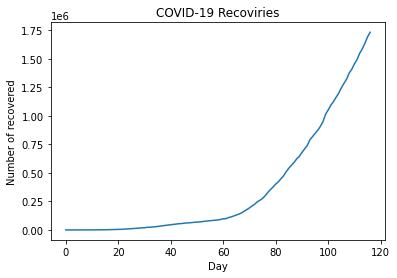

In [21]:
plt.plot(total_recovered)
plt.title("COVID-19 Recoviries")
plt.xlabel("Day")
plt.ylabel("Number of recovered")
plt.show()

In [22]:
confirmed_df.keys()

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '5/8/20', '5/9/20', '5/10/20', '5/11/20', '5/12/20', '5/13/20',
       '5/14/20', '5/15/20', '5/16/20', '5/17/20'],
      dtype='object', length=121)